# Inferência Estatística (GCC1625) - Trabalho 2
- Nome completo: ANA CAROLINA SÁ COELHO DA SILVA
- Link para o vídeo 

# (1) Máquina Desregulada?

Considere que uma máquina de preenchimento de garrafas está configurada para preencher cada garrafa com 500 ml de vinho. O fabricante suspeita de que essa máquina está preenchendo as garrafas com valores a menor. Ele então coleta uma amostra de 20 garrafas preenchidas a partir da linha de produção e mede cuidadosamente o volume em cada uma delas. Os resultados obtidos nessas medições estão a seguir (valores em miligramas):


484.11, 459.49, 471.38, 512.01, 494.48, 528.63, 493.64, 485.03, 473.88, 501.59,
502.85, 538.08, 465.68, 495.03, 475.32, 529.41, 518.13, 464.32, 449.08, 489.27

Nessa parte do trabalho você deve verificar a alegação de que a máquina está desregulada, conforme a suspeita do fabricante.

#### (i) Os procedimentos paramétricos de testes de hipóteses sobre uma amostra que estudamos em nosso curso presumem que a amostra a ser usada é proveniente de uma distribuição aproximadamente normal. Para a amostra fornecida verifique essa hipótese usando dois dos testes de normalidade que estudamos no curso, o teste de Shapiro-Wilk e o teste usando QQ-plot. Nessa verificação defina o nível de significância como α = 0.05.

In [13]:
# imports iniciais
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t


Estatística de Shapiro-Wilk: 0.9733
P-valor: 0.8223
Não rejeitamos H0: A amostra parece vir de uma distribuição normal.


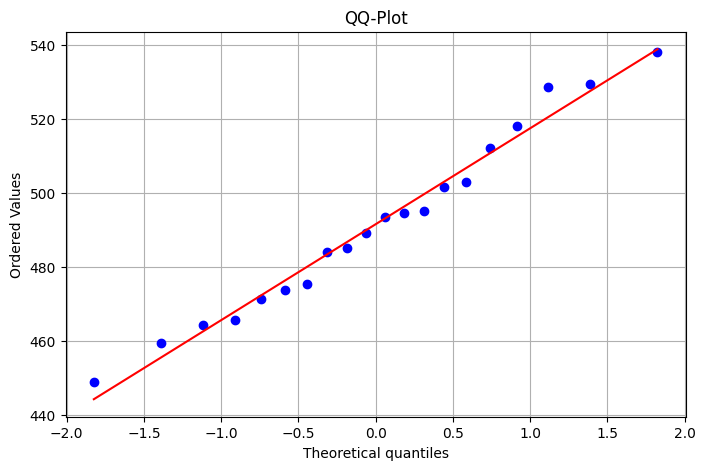

In [7]:
# teste de shapiro-wilk
dados = [
    484.11, 459.49, 471.38, 512.01, 494.48, 528.63, 493.64, 485.03, 473.88, 501.59,
    502.85, 538.08, 465.68, 495.03, 475.32, 529.41, 518.13, 464.32, 449.08, 489.27
]

shapiro_stat, shapiro_p = stats.shapiro(dados)
print(f'Estatística de Shapiro-Wilk: {shapiro_stat:.4f}')
print(f'P-valor: {shapiro_p:.4f}')
alpha = 0.05
if shapiro_p > alpha:
    print("Não rejeitamos H0: A amostra parece vir de uma distribuição normal.")
else:
    print("Rejeitamos H0: A amostra não parece vir de uma distribuição normal.")
    
# QQ-Plot
plt.figure(figsize=(8, 5))
stats.probplot(dados, dist="norm", plot=plt)
plt.title('QQ-Plot')
plt.grid(True)
plt.show()


Explicação:

Com base no teste de Shapiro-Wilk, observamos o valor-p obtido para verificar a hipótese de que os dados seguem uma distribuição normal. Se esse valor-p for maior que o nível de significância adotado (α = 0.05), não rejeitamos a hipótese nula, o que sugere que os dados não apresentam evidências significativas de desvio da normalidade. Complementarmente, o QQ-Plot nos permite uma verificação visual: se os pontos estiverem aproximadamente alinhados sobre a reta, isso reforça a ideia de que os dados podem ser considerados normalmente distribuídos. A concordância entre ambos os métodos fortalece a conclusão sobre a distribuição dos dados.


#### (ii) Agora, aplique o teste de hipóteses. Repare que a variância da população é desconhecida; sendo assim, certifique-se de usar o procedimento de teste de hipóteses adequado para essa situação. Apresente sua análise para o nível de significância igual a 1%. Apresente e descreva claramente a aplicação dos quatro passos do procedimento.

**Passo 1: Definir as hipóteses**

- H₀ (hipótese nula): μ = 500 (a média de preenchimento é 500 ml) -> não há defeito
- H₁ (hipótese alternativa): μ < 500 (a média de preenchimento é menor que 500 ml) -> defeito


**Passo 2: Computar a estatística de Teste**
Como a variância da população é desconhecida e a amostra é pequena (n < 30), utilizamos o **teste t**:

$$
t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}
$$

onde:
- $\bar{x}$ = média amostral
- $\mu_0$ = média populacional sob H₀ (500 ml)
- $s$ = desvio padrão amostral
- $n$= tamanho da amostra


**Passo 3: Computar o $p$-valor associado à estatística de teste**

 O cálculo do valor-p depende da **direção do teste de hipóteses**:

- **Teste unilateral à esquerda ($H_1: \mu < \mu_0$):**  
  $$ p\text{-valor} = P(T \leq t_{\text{calculado}}) = \text{t.cdf}(t_{\text{calculado}}, df) $$

- **Teste unilateral à direita ($H_1: \mu > \mu_0$):**  
  $$ p\text{-valor} = P(T \geq t_{\text{calculado}}) = 1 - \text{t.cdf}(t_{\text{calculado}}, df) $$

- **Teste bilateral ($H_1: \mu \neq \mu_0$):**  
  $$ p\text{-valor} = 2 \cdot P(T \geq |t_{\text{calculado}}|) = 2 \cdot (\text{t.cdf}(t_{\text{calculado}}, df)) $$

Onde:
- `t_calculado` é a estatística de teste obtida -> t score
- `df` é o número de graus de liberdade da amostra ($n - 1$)


**Passo 4: Interpretar e declarar o resultado**

Se $p\text{-valor} < \alpha$, rejeitamos $H_0$.
Em caso contrário, falhamos em rejeitar $H_0$.


In [17]:
# código

# estatisticas
media_amostral = np.mean(dados)
desvio_padrao = np.std(dados, ddof=1)
n = len(dados)
mu0 = 500
alpha = 0.01

# passo 2
# t
t_score = (media_amostral - mu0) / (desvio_padrao / np.sqrt(n))

# passo 3
# p-valor
p_valor = t.cdf(t_score, df=n-1)

print(f'Média amostral: {media_amostral:.2f}')
print(f'T-score: {t_score:.4f}')
print(f'P-valor: {p_valor:.4f}')
print("Decisão:")
# passo 4
if p_valor < alpha:
    print("Rejeitar a hipótese nula")
else:
    print("Falha ao rejeitar a hipótese nula")


Média amostral: 491.57
T-score: -1.5205
P-valor: 0.0724
Decisão:
Falha ao rejeitar a hipótese nula


Explicação: Os passos descritos anteriormente são executados pelo código acima, avaliando se a média de uma amostra é estatisticamente igual a um valor específico (média populacional). 

São definidas, inicialmente, média amostral, desvio padrão amostral, tamanho da amostra, média populacional (500) e alpha. 

Com isso, com a fórmula descrita anteriormente, é calculado o t_score e, depois, o p-valor com t.cdf() (t-Student). 

Por fim, comparamos o p-valor obtido com o valor de alpha. Como p-valor não é menor que o alpha, podemos afirmar que falhamos em rejeitar a hipótese nula, ou seja, $H_0$ não é rejeitada.